<a href="https://colab.research.google.com/github/Ssactl/AH2179_Applied-AI-in-Transportation/blob/main/Module5_Assignment_2_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
from dateutil.relativedelta import relativedelta
from matplotlib.patches import Polygon
from matplotlib.lines import Line2D
from matplotlib import gridspec
from matplotlib.patches import Patch
from matplotlib import colors

def assign_colors(n_clusters, days, assigments):

    days_colors = []
    color_to_cluster = []
    style_to_cluster = []
    weekend_colors = ['#67001f','#d6604d','#fdae61','#f46d43','#d53e4f','#9e0142','#f768a1','#f1c232']#,'#fe9929','#cc4c02','#e31a1c','#737373','#bdbdbd','#252525','#bcbddc']
#    weekend_school_colors = ['#c2a5cf','#f1b6da','#8e0152','#c51b7d','#de77ae','#ae017e','#fcc5c0','#e31a1c','#737373','#bdbdbd']
#    bank_holidays_colors = ['#543005','#dfc27d','#bf812d','#8c510a']
    mixed_colors = ['#4d4d4d','#35978f','#bababa','#878787']
    weekday_colors = ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#cab2d6','#6a3d9a','#b15928','#8dd3c7','#bebada','#fb8072','#b3de69','#bc80bd','#fccde5','#ccebc5','#35978f','#80cdc1']

    cluster_id_weekdays_share = []
    cluster_id_weekend_share = []
    cluster_id_all_days = []

    for i in range(0,n_clusters):
        color_to_cluster.append(None)
        style_to_cluster.append(None)
        cluster_id_weekdays_share.append(0)
        cluster_id_weekend_share.append(0)
        cluster_id_all_days.append(0)

    for i in range(0,len(days)):
        #print(i,assigments[i],len(assigments),len(cluster_id_all_days))
        if assigments[i] is not None:
            cluster_id_all_days[assigments[i]] += 1
            if '-' in str(days[i]):
                pomT = datetime.datetime.strptime(str(days[i]),'%Y-%m-%d')
            else:
                pomT = datetime.datetime.strptime(str(days[i]),'%Y%m%d')

            if int(pomT.weekday()) < 5:
                cluster_id_weekdays_share[assigments[i]] += 1
            else:
                cluster_id_weekend_share[assigments[i]] += 1

    print('cluster_id_weekdays_share',cluster_id_weekdays_share)
    print('cluster_id_weekend_share',cluster_id_weekend_share)
    for i in range(0,len(days)):
        if assigments[i] is not None:
            cluster_idx = assigments[i]
            if '-' in str(days[i]):
                pomT = datetime.datetime.strptime(str(days[i]),'%Y-%m-%d')
            else:
                pomT = datetime.datetime.strptime(str(days[i]),'%Y%m%d')
            if color_to_cluster[assigments[i]] is None:
                if cluster_id_weekend_share[cluster_idx] / float(cluster_id_all_days[cluster_idx]) > 0.6:
                        color_to_cluster[assigments[i]] = weekend_colors.pop()
                        style_to_cluster[assigments[i]] = ':'
                elif cluster_id_weekdays_share[cluster_idx] / float(cluster_id_all_days[cluster_idx]) > 0.6:
                        color_to_cluster[assigments[i]] = weekday_colors.pop(0)
                        style_to_cluster[assigments[i]] = '-'
                else:
                    color_to_cluster[assigments[i]] = mixed_colors.pop()
                    style_to_cluster[assigments[i]] = ':'

            days_colors.append(color_to_cluster[assigments[i]])
        else:
            days_colors.append(None)

    return days_colors,color_to_cluster,style_to_cluster


def calmap(ax, year, data, days, assigments, n_clusters,days_colors,color_to_cluster,
           limit_graphics=False):

    ax.tick_params('x', length=0, labelsize="medium", which='major')
    ax.tick_params('y', length=0, labelsize="x-small", which='major')

    # Month borders

    xticks, labels = [], []
    start = datetime.datetime(year,1,1).weekday()

    for month in range(1,13):

        first = datetime.datetime(year, month, 1)
        last = first + relativedelta(months=1, days=-1)

        y0 = first.weekday()
        y1 = last.weekday()
        x0 = (int(first.strftime("%j"))+start-1)//7
        x1 = (int(last.strftime("%j"))+start-1)//7

        P = [ (x0,   y0), (x0,    7),  (x1,   7),
              (x1,   y1+1), (x1+1,  y1+1), (x1+1, 0),
              (x0+1,  0), (x0+1,  y0) ]

        xticks.append(x0 +(x1-x0+1)/2)
        labels.append(first.strftime("%b"))
        poly = Polygon(P, edgecolor="black", facecolor="None",

                       linewidth=1, zorder=20, clip_on=False)

        ax.add_artist(poly)

    line = Line2D([0,53],[5,5],linewidth=1, zorder = 20,color="black",linestyle='dashed')
    ax.add_artist(line)

    if not limit_graphics:
        ax.set_xticks(xticks)
        ax.set_xticklabels(labels)
        ax.set_yticks(0.5 + np.arange(7))
        ax.set_yticklabels(["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])
        ax.set_title("{}".format(year), weight="semibold")
    else:
        plt.tick_params(
            axis='x',          # changes apply to the x-axis
            which='both',      # both major and minor ticks are affected
            bottom=False,      # ticks along the bottom edge are off
            top=False,         # ticks along the top edge are off
            labelbottom=False)
        plt.tick_params(
            axis='y',          # changes apply to the x-axis
            which='both',      # both major and minor ticks are affected
            left=False,      # ticks along the bottom edge are off
            right=False,         # ticks along the top edge are off
            labelleft=False)

    # Clearing first and last day from the data
    valid = datetime.datetime(year, 1, 1).weekday()
    data[:valid,0] = np.nan
    valid = datetime.datetime(year, 12, 31).weekday()
    # data[:,x1+1:] = np.nan
    data[valid+1:,x1] = np.nan

    for i in range(0,len(days)):
        if '-' in str(days[i]):
            pomT = datetime.datetime.strptime(str(days[i]),'%Y-%m-%d')
        else:
            pomT = datetime.datetime.strptime(str(days[i]),'%Y%m%d')
        week_number = int(pomT.strftime("%W"))
        day_of_week = int(pomT.weekday())
        data[day_of_week,week_number] = assigments[i]


    act_date = datetime.datetime(year,1,1)
    while (act_date.year == year):

        week_number = int(act_date.strftime("%W"))
        day_of_week = int(act_date.weekday())
        doy_id = act_date.timetuple().tm_yday
        if doy_id<5 and week_number > 53:
            week_number = 0

        act_date = act_date + datetime.timedelta(days=1)

    #pomT = datetime.datetime.strptime('2017-01-01','%Y-%m-%d')
    #week_number = int(pomT.strftime("%V"))
    #day_of_week = int(pomT.weekday())
    #print(week_number,day_of_week)
    #doy_id = pomT.timetuple().tm_yday
    #if doy_id<5 and week_number > 0:
    #    week_number = 0
    #data[day_of_week,week_number] = len(clusters)+10

    # Showing data
    cmap = plt.cm.spring  # Can be any colormap that you want after the cm
    cmap.set_bad(color='white')

    #ax.imshow(data, extent=[0,53,0,7], zorder=10, vmin=0, vmax=len(clusters)+10,
    #          cmap=cmap, origin="lower", alpha=.75)

    cmap = colors.ListedColormap(color_to_cluster)
    bounds=[-0.1]
    step = 1
    for i in range(0,n_clusters):
        bounds.append(i-0.1+step)
    norm = colors.BoundaryNorm(bounds, cmap.N)
    #print(color_to_cluster)
   #print(bounds)
    #print(norm)

    #print(color_to_cluster)
    #print(bounds)
    #print(cmap)
    #exit(0)

    ax.imshow(data, extent=[0,53,0,7], zorder=10, interpolation='nearest', origin='lower',cmap=cmap, norm=norm)

def make_calendar_visualization_figure(days,assigments,n_clusters,years,days_colors,color_to_cluster,
                                       save_figure: str = None, show_figure:bool = True, limit_graphics = False):

    fig = plt.figure(figsize=(8,1.5*len(years)), dpi=100)
    X = np.linspace(-1,1, 53*7)

    for i, obj in enumerate(years):

        pom_s = str(len(years))+'1'+str(i+1)
        print(pom_s)

        ax = plt.subplot(int(pom_s), xlim=[0, 53], ylim=[0, 7], frameon=False, aspect=1)
        I = 1.2 - np.cos(X.ravel()) + np.random.normal(0,.2, X.size)
        I = I.reshape(53,7).T
        I.fill(np.nan)
        calmap(ax, int(obj), I.reshape(53,7).T, days, assigments, n_clusters,days_colors,color_to_cluster, limit_graphics)

    #   ax = plt.subplot(212, xlim=[0,53], ylim=[0,7], frameon=False, aspect=1)
    #  I = 1.1 - np.cos(X.ravel()) + np.random.normal(0,.2, X.size)
    #   calmap(ax, 2018, I.reshape(53,7).T)

    #ax = plt.subplot(313, xlim=[0,53], ylim=[0,7], frameon=False, aspect=1)
    #I = 1.0 - np.cos(X.ravel()) + np.random.normal(0,.2, X.size)
    #calmap(ax, 2019, I.reshape(53,7).T)
    if save_figure:
        plt.savefig(save_figure)

    if show_figure or save_figure is None:
        plt.tight_layout()
        plt.show()


def make_figure_centroids(x,y,color_to_cluster,style_to_cluster,cluster_ids,minY = None,maxY = None,
                          save_figure: str = None, show_figure:bool = True):

    #print(color_to_cluster)
    fig = plt.figure(figsize=(8,3))
    ax = fig.add_subplot(111)
    for i in range(0,len(x)):
        #print(i,color_to_cluster[i],style_to_cluster[i])
        #print(y[i])
        ax.plot(x[i],y[i],style_to_cluster[i], color=color_to_cluster[i], label=str(cluster_ids[i]))
    ax.set_xlabel('Time of day')
    ax.set_ylabel('Flow')
    if minY is not None and maxY is not None:
        ax.set_ylim([minY, maxY])
    plt.legend()

    if save_figure:
        plt.savefig(save_figure)

    if show_figure or save_figure is None:
        plt.tight_layout()
        plt.show()


In [52]:
nintvals=288
# Create an array 'x_axis' representing the 5-minute intervals
x_axis = np.arange(0, nintvals, 1, dtype=int)
# Initialize an empty list 'x_axis_hours' to store time values in hours
x_axis_hours = []
# Convert interval indices to hours and append them to 'x_axis_hours'
for i in range(0, len(x_axis)):
  x_axis_hours.append(float(x_axis[i]*5)/60)

In [5]:
#load the data

import pandas as pd
import numpy as np
#upload the dataset by downloading both datasets from canvas and upload it on colab

data_df = pd.read_csv("/content/dataset_exercise_5_clustering_highway_traffic.csv",sep=";")
# Read the evaluation dataset from a CSV file
data_eval_df = pd.read_csv("/content/evaluation_dataset_exercise_5_clustering_highway_traffic.csv", sep=";")

data_df

,PORTAL,Date,time_from,time_to,Interval_5,SPEED_MS_AVG,flow
0,"E4S 56,780",20210101,00:00:00,00:05:00,0,18.56,39
1,"E4S 56,780",20210101,00:05:00,00:10:00,1,20.39,18
2,"E4S 56,780",20210101,00:10:00,00:15:00,2,19.27,26
3,"E4S 56,780",20210101,00:15:00,00:20:00,3,19.52,52
4,"E4S 56,780",20210101,00:20:00,00:25:00,4,20.52,52
...,...,...,...,...,...,...,...
60258,"E4S 56,780",20210729,18:30:00,18:35:00,222,18.84,197
60259,"E4S 56,780",20210729,18:35:00,18:40:00,223,18.85,156
60260,"E4S 56,780",20210729,18:40:00,18:45:00,224,18.68,191
60261,"E4S 56,780",20210729,18:45:00,18:50:00,225,19.05,189


In [51]:
data_eval_df

,PORTAL,Date,time_from,time_to,Interval_5,SPEED_MS_AVG,flow
0,"E4S 56,780",20220108,00:00:00,00:05:00,0,16.74,35
1,"E4S 56,780",20220108,00:05:00,00:10:00,1,17.57,29
2,"E4S 56,780",20220108,00:10:00,00:15:00,2,16.94,32
3,"E4S 56,780",20220108,00:15:00,00:20:00,3,17.50,27
4,"E4S 56,780",20220108,00:20:00,00:25:00,4,16.21,31
...,...,...,...,...,...,...,...
22939,"E4S 56,780",20221230,23:35:00,23:40:00,283,19.83,43
22940,"E4S 56,780",20221230,23:40:00,23:45:00,284,19.01,35
22941,"E4S 56,780",20221230,23:45:00,23:50:00,285,19.72,45
22942,"E4S 56,780",20221230,23:50:00,23:55:00,286,20.64,49


In [57]:
#day clustering

# Define the total number of 5-minute intervals in a day
nintvals = 288
ndays=None

def day_clustring(data_df):

    # Sort the DataFrame 'data_df' by columns "Date" and "Interval_5"
    data_df.sort_values(["Date", "Interval_5"])

    # Extract unique dates from the sorted DataFrame
    days = np.unique(data_df[['Date']].values.ravel())
    # Calculate the total number of unique days
    ndays = len(days)

    # Group the DataFrame 'data_df' by the "Date" column
    day_subsets_df = data_df.groupby(["Date"])

    # Create a matrix 'vectorized_day_dataset' filled with NaN values
    vectorized_day_dataset = np.zeros((ndays, nintvals))
    vectorized_day_dataset.fill(np.nan)

    # Loop through each unique day
    for i in range(0, ndays):
        # Get the DataFrame corresponding to the current day
        df_t = day_subsets_df.get_group(days[i])

        # Loop through each row in the current day's DataFrame
        for j in range(len(df_t)):
            # Get the current day's DataFrame
            df_t = day_subsets_df.get_group(days[i])

            # Extract the "Interval_5" and "flow" values and populate 'vectorized_day_dataset'
            vectorized_day_dataset[i, df_t.iloc[j]["Interval_5"]] = df_t.iloc[j]["flow"]

    # Print the resulting 'vectorized_day_dataset'
    return vectorized_day_dataset

vectorized_day_dataset=day_clustring(data_df)
vectorized_day_dataset_eval=day_clustring(data_eval_df)

print(vectorized_day_dataset)
print(vectorized_day_dataset_eval)


[[39. 18. 26. ... 32. 39. 34.]
 [30. 32. 27. ... 44. 41. 39.]
 [36. 44. 52. ... 50. 45. 23.]
 ...
 [17. 32. 29. ... 10. nan  1.]
 [ 2.  1.  1. ...  3.  1.  3.]
 [ 1.  3.  1. ... nan nan nan]]
[[35. 29. 32. ... 62. 66. 71.]
 [44. 44. 51. ... 30. 31. 23.]
 [21. 22. 17. ... 20. 22. 22.]
 ...
 [17. 17. 20. ... 35. 25. 27.]
 [37. 25. 30. ... 37. 36. 49.]
 [42. 28. 32. ... 45. 49. 38.]]


In [7]:
#remove missing values

nans_per_day = np.sum(np.isnan(vectorized_day_dataset),1)
days = np.unique(data_df[['Date']].values.ravel())
vectorized_day_dataset_no_nans = vectorized_day_dataset[np.where(nans_per_day == 0)[0],:]
days_not_nans = days[np.where(nans_per_day == 0)[0]]

nans_per_day_eval = np.sum(np.isnan(vectorized_day_dataset_eval), 1)
days_eval = np.unique(data_eval_df[['Date']].values.ravel())
vectorized_day_dataset_no_nans_eval = vectorized_day_dataset_eval[np.where(nans_per_day_eval == 0)[0], :]
days_not_nans_eval = days_eval[np.where(nans_per_day_eval == 0)[0]]
# Calculate the total number of days in the filtered evaluation dataset
ndays_eval_not_nans = len(days_not_nans_eval)


In [8]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import calinski_harabasz_score, silhouette_score, davies_bouldin_score
import sklearn.metrics.pairwise as dis_lib

In [9]:
#clustering evaluation

#internal evaluation
def internal_eval(vectorized_day_dataset_no_nans,cluster_labels):
    # Calculate the Silhouette Score
    SC_score = silhouette_score(vectorized_day_dataset_no_nans, cluster_labels)
    # Silhouette Score measures the quality of clusters, higher values indicate better separation.

    # Calculate the Davies-Bouldin Score
    DB_score = davies_bouldin_score(vectorized_day_dataset_no_nans, cluster_labels)
    # Davies-Bouldin Score measures the average similarity between each cluster and its most similar cluster, lower values indicate better separation.

    # Calculate the Calinski-Harabasz Score
    CH_score = calinski_harabasz_score(vectorized_day_dataset_no_nans, cluster_labels)
    # Calinski-Harabasz Score measures the ratio of between-cluster variance to within-cluster variance, higher values indicate better separation.

    # Print the computed cluster quality scores
    print('Silhouette Score:', SC_score)
    print('Davies-Bouldin Score:', DB_score)
    print('Calinski-Harabasz Score:', CH_score)
    return {"SC_score":SC_score,"DB_score":DB_score,"CH_score":CH_score}



#external evaluation with short-term prediction
# Define a function to find the closest centroid to a new data point within a specified day-time interval range
def find_the_closest_centroid(centroids, new_day, from_interval: int, to_interval: int):
    closest_centroid = None
    closest_dist = None

    # Iterate through each centroid
    for i in range(0, len(centroids)):
        # Calculate the Euclidean distance between the centroid and the new data point
        ed_t = dis_lib.paired_distances(centroids[i], new_day, metric='euclidean')

        # Check if the current centroid is closer than the previously closest one
        if closest_centroid is None or closest_dist > ed_t:
            closest_centroid = i
            closest_dist = ed_t

    return closest_centroid



def external_eval(n_clusters_t,nintvals,ndays_eval_not_nans,cluster_labels):
    # Initialize a list to store centroid data
    centroids = []

    # Calculate centroids for each cluster
    for i in np.unique(cluster_labels):
        centroid = np.nanmean(vectorized_day_dataset_no_nans[np.where(cluster_labels == i)[0], :], 0).reshape(1, nintvals)
        centroids.append(centroid)

    # Define the number of past intervals to consider for classification
    n_past_intervals_for_classification = 5

    # Initialize variables to calculate accuracy metrics
    total_mae = 0
    total_mape = 0
    prediction_counts = 0

    # Loop through each day in the evaluation dataset with no missing values
    for i in range(0, ndays_eval_not_nans):
        # Loop through intervals from n_past_intervals_for_classification to nintvals - 1
        for j in range(n_past_intervals_for_classification, nintvals - 1):
            # Find the closest centroid for the current data point
            centroid_index = find_the_closest_centroid(centroids, vectorized_day_dataset_no_nans_eval[i].reshape(1, nintvals), j - n_past_intervals_for_classification, j)

            # Predict the value for the next interval
            predicted_value = centroids[centroid_index][0, j + 1]

            # Calculate Mean Absolute Error (MAE) and Mean Absolute Percentage Error (MAPE)
            mae_t = abs(predicted_value - vectorized_day_dataset_no_nans_eval[i][j + 1])
            mape_t = abs(predicted_value - vectorized_day_dataset_no_nans_eval[i][j + 1]) / float(vectorized_day_dataset_no_nans_eval[i][j + 1])

            # Accumulate MAE, MAPE, and count of predictions
            total_mae += mae_t
            total_mape += mape_t
            prediction_counts += 1

    # Calculate and print the prediction accuracy metrics
    print('Prediction accuracy MAE:', total_mae / prediction_counts)
    print('Prediction accuracy MAPE:', total_mape / prediction_counts)
    return {"MAE":total_mae / prediction_counts,"MAPE":total_mape / prediction_counts}

In [10]:
#clustering
from sklearn.model_selection import GridSearchCV

#KNN

In [11]:
#k-means

n_clusters=range(2,11)
clusters=None
cluster_labels=None

results_knn=pd.DataFrame()

for i in n_clusters:
  clusters = KMeans(n_clusters=i, random_state=0, n_init="auto").fit(vectorized_day_dataset_no_nans)

  if clusters is not None:
    cluster_labels = clusters.labels_
  # Calculate the number of clusters by finding unique values in 'cluster_labels'
  n_clusters_t = len(np.unique(cluster_labels))

  result={}

  result.update(internal_eval(vectorized_day_dataset_no_nans,cluster_labels))
  # result.update(external_eval(n_clusters_t,nintvals,ndays_eval_not_nans,cluster_labels))

  results_knn[i]=result

Silhouette Score: 0.3035475827473832
Davies-Bouldin Score: 1.1783533136957371
Calinski-Harabasz Score: 86.95978440655571
Silhouette Score: 0.354303036809368
Davies-Bouldin Score: 1.1053191840535013
Calinski-Harabasz Score: 124.63256715526792
Silhouette Score: 0.33529037967137854
Davies-Bouldin Score: 1.2799700500617934
Calinski-Harabasz Score: 112.18199070403132
Silhouette Score: 0.30106660595026524
Davies-Bouldin Score: 1.3658377891411744
Calinski-Harabasz Score: 87.00924721488506
Silhouette Score: 0.25832985798861724
Davies-Bouldin Score: 1.4197289989529709
Calinski-Harabasz Score: 75.14266680541942
Silhouette Score: 0.28482131149658807
Davies-Bouldin Score: 1.342371931017034
Calinski-Harabasz Score: 72.15393490327955
Silhouette Score: 0.24873585568278805
Davies-Bouldin Score: 1.4443967885322349
Calinski-Harabasz Score: 69.47142248982833
Silhouette Score: 0.21032437576500956
Davies-Bouldin Score: 1.4587137447988798
Calinski-Harabasz Score: 65.024463585232
Silhouette Score: 0.17554488

In [12]:
results_knn

,2,3,4,5,6,7,8,9,10
SC_score,0.303548,0.354303,0.335290,0.301067,0.258330,0.284821,0.248736,0.210324,0.175545
DB_score,1.178353,1.105319,1.279970,1.365838,1.419729,1.342372,1.444397,1.458714,1.683701
CH_score,86.959784,124.632567,112.181991,87.009247,75.142667,72.153935,69.471422,65.024464,59.490299


Text(0.5, 1.0, 'CH_score')

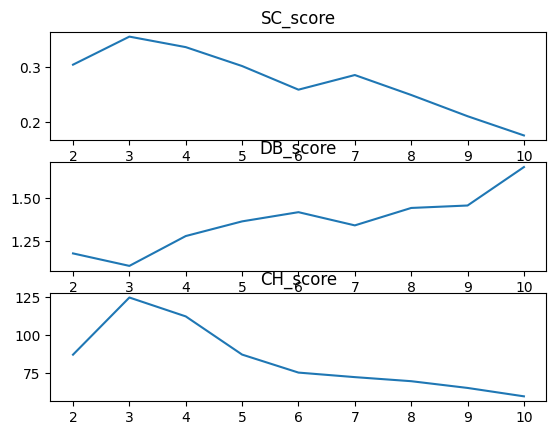

In [22]:
import matplotlib.pyplot as plt
plt.subplot(3, 1, 1)
plt.plot(range(2,11),results_knn.loc['SC_score'])
plt.title('SC_score')
plt.subplot(3, 1, 2)
plt.plot(range(2,11),results_knn.loc['DB_score'])
plt.title('DB_score')
plt.subplot(3, 1, 3)
plt.plot(range(2,11),results_knn.loc['CH_score'])
plt.title('CH_score')

In [41]:
#best KNN
n_clusters=[2]
clusters=None
cluster_labels=None

for i in n_clusters:
  clusters = KMeans(n_clusters=i, random_state=0, n_init="auto").fit(vectorized_day_dataset_no_nans_eval)

  if clusters is not None:
    cluster_labels = clusters.labels_
  # Calculate the number of clusters by finding unique values in 'cluster_labels'
  n_clusters_t = len(np.unique(cluster_labels))

  external_eval(n_clusters_t,nintvals,ndays_eval_not_nans,cluster_labels)


Prediction accuracy MAE: 50.58654537979181
Prediction accuracy MAPE: 0.5081426723707018


cluster_id_weekdays_share [48, 2]
cluster_id_weekend_share [19, 0]
111


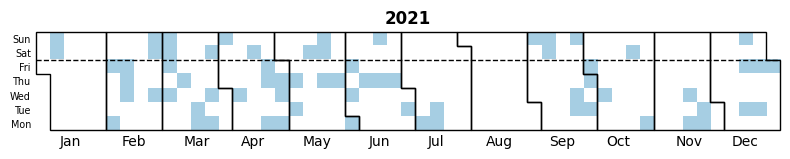

<ipython-input-53-0ddf134c7f27>:25: RuntimeWarning: Mean of empty slice
  centroid_yy = list(np.nanmean(vectorized_day_dataset_no_nans[np.where(cluster_labels == i)[0], :], 0).transpose())


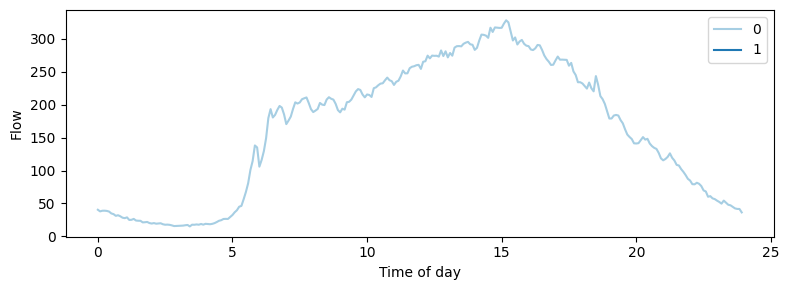

In [53]:
import datetime
# Calculate the number of clusters by finding unique values in 'cluster_labels'
n_clusters_t = len(np.unique(cluster_labels))

# Assign colors to days based on clusters
days_colors, color_to_cluster, style_to_cluster = assign_colors(n_clusters_t, days_not_nans_eval, cluster_labels)
# The function 'assign_colors' is used to determine colors and styles for visualization.

# Create a calendar visualization figure
make_calendar_visualization_figure(days_not_nans_eval, cluster_labels, n_clusters_t, [2021], days_colors,
                                   color_to_cluster, save_figure=None)


# Initialize empty lists to store centroid data
centroids_xx = []  # x-axis values for centroids
centroids_yy_daytypes = []  # y-axis values for centroids, grouped by day types
cluster_ids = []  # Cluster IDs

# Iterate through each cluster
for i in range(0, n_clusters_t):
    # Store the x-axis values for centroids (hours of the day)
    centroids_xx.append(x_axis_hours)

    # Calculate the y-axis values for centroids (average flow for each 5-minute interval)
    centroid_yy = list(np.nanmean(vectorized_day_dataset_no_nans[np.where(cluster_labels == i)[0], :], 0).transpose())
    centroids_yy_daytypes.append(centroid_yy)

    # Store the cluster ID
    cluster_ids.append(i)

# Generate a figure displaying the centroids
make_figure_centroids(centroids_xx, centroids_yy_daytypes, color_to_cluster, style_to_cluster, cluster_ids)
# The function 'make_figure_centroids' is used to create a visualization of the centroids,
# with the provided data and parameters.

#Agglomerative

In [23]:
#AgglomerativeClustering

n_clusters=range(2,11)
# metric=['euclidean','manhattan','cosine']
# linkage=['ward','complete','average','single']
clusters=None
cluster_labels=None

results_agg=pd.DataFrame()

for i in n_clusters:

  clusters = AgglomerativeClustering(n_clusters=i,metric='euclidean',linkage='ward').fit(vectorized_day_dataset_no_nans)

  if clusters is not None:
    cluster_labels = clusters.labels_
  # Calculate the number of clusters by finding unique values in 'cluster_labels'
  n_clusters_t = len(np.unique(cluster_labels))
  result={}

  result.update(internal_eval(vectorized_day_dataset_no_nans,cluster_labels))
  # result.update(external_eval(n_clusters_t,nintvals,ndays_eval_not_nans,cluster_labels))

  results_agg[i]=result

results_agg

Silhouette Score: 0.36841072555971627
Davies-Bouldin Score: 0.8793706571433589
Calinski-Harabasz Score: 104.68806876209166
Silhouette Score: 0.35450819334083117
Davies-Bouldin Score: 1.1054778092082087
Calinski-Harabasz Score: 120.9502927780464
Silhouette Score: 0.3360157690447733
Davies-Bouldin Score: 1.21717495040951
Calinski-Harabasz Score: 108.44955936206395
Silhouette Score: 0.3180683478235529
Davies-Bouldin Score: 0.9973293881269564
Calinski-Harabasz Score: 91.6579436141811
Silhouette Score: 0.27069042719854364
Davies-Bouldin Score: 1.3385250479467485
Calinski-Harabasz Score: 82.07867599260933
Silhouette Score: 0.23985656693174764
Davies-Bouldin Score: 1.3960667165277734
Calinski-Harabasz Score: 76.6094741688033
Silhouette Score: 0.1954141556646174
Davies-Bouldin Score: 1.4639020858688894
Calinski-Harabasz Score: 70.41860744988178
Silhouette Score: 0.1862871613383781
Davies-Bouldin Score: 1.4619689948408148
Calinski-Harabasz Score: 64.3713242373561
Silhouette Score: 0.18774465812

,2,3,4,5,6,7,8,9,10
SC_score,0.368411,0.354508,0.336016,0.318068,0.270690,0.239857,0.195414,0.186287,0.187745
DB_score,0.879371,1.105478,1.217175,0.997329,1.338525,1.396067,1.463902,1.461969,1.439012
CH_score,104.688069,120.950293,108.449559,91.657944,82.078676,76.609474,70.418607,64.371324,59.602533


Text(0.5, 1.0, 'CH_score')

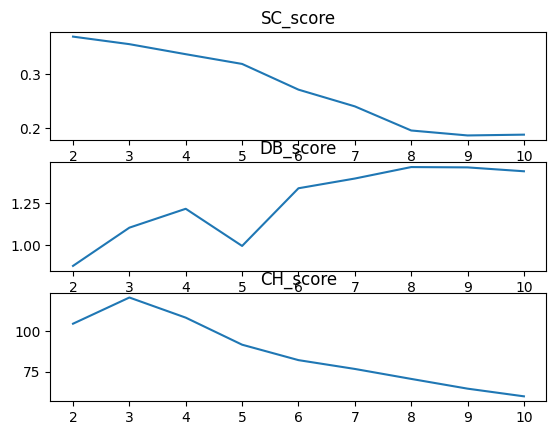

In [24]:
plt.subplot(3, 1, 1)
plt.plot(range(2,11),results_agg.loc['SC_score'])
plt.title('SC_score')
plt.subplot(3, 1, 2)
plt.plot(range(2,11),results_agg.loc['DB_score'])
plt.title('DB_score')
plt.subplot(3, 1, 3)
plt.plot(range(2,11),results_agg.loc['CH_score'])
plt.title('CH_score')

Prediction accuracy MAE: 50.49235866043881
Prediction accuracy MAPE: 0.508357834556921
cluster_id_weekdays_share [8, 42]
cluster_id_weekend_share [19, 0]
111


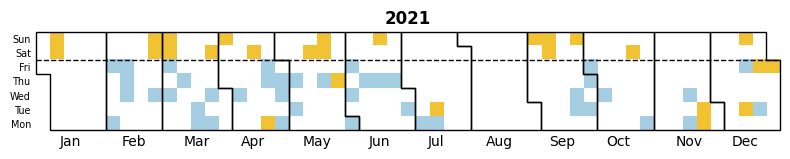

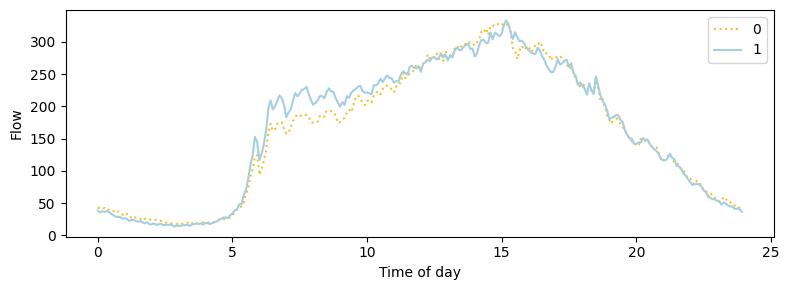

Prediction accuracy MAE: 48.04978582591887
Prediction accuracy MAPE: 0.5015866033489851
cluster_id_weekdays_share [42, 7, 1]
cluster_id_weekend_share [0, 19, 0]
111


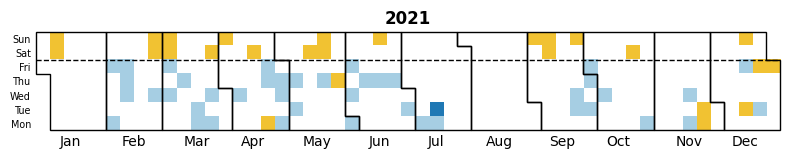

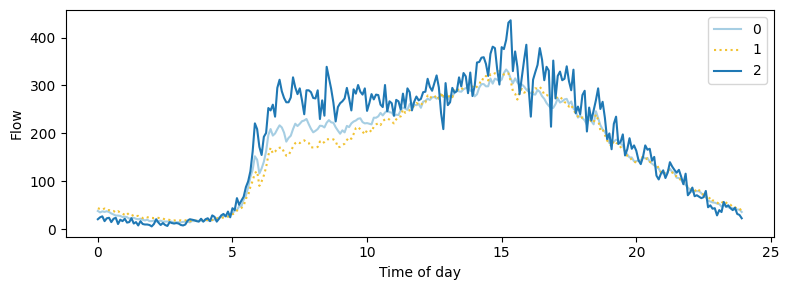

Prediction accuracy MAE: 47.13004077157633
Prediction accuracy MAPE: 0.488751024489142
cluster_id_weekdays_share [2, 18, 1, 24, 5]
cluster_id_weekend_share [18, 0, 0, 0, 1]
111


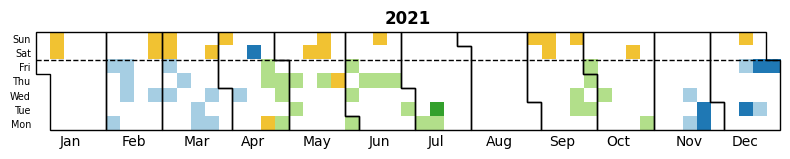

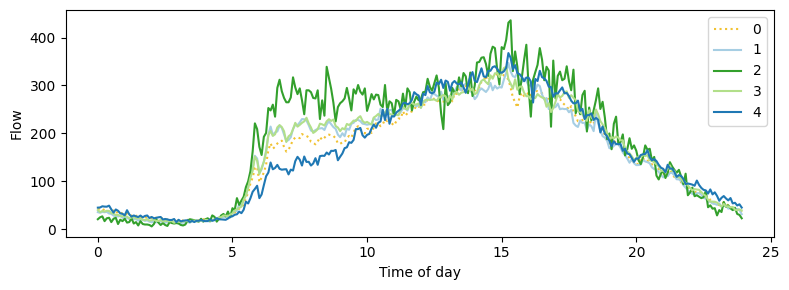

In [54]:
n_clusters=[2,3,5]
# metric=['euclidean','manhattan','cosine']
# linkage=['ward','complete','average','single']
clusters=None
cluster_labels=None

results_agg=pd.DataFrame()

for i in n_clusters:

  clusters = AgglomerativeClustering(n_clusters=i,metric='euclidean',linkage='ward').fit(vectorized_day_dataset_no_nans_eval)

  if clusters is not None:
    cluster_labels = clusters.labels_
  # Calculate the number of clusters by finding unique values in 'cluster_labels'
  n_clusters_t = len(np.unique(cluster_labels))

  external_eval(n_clusters_t,nintvals,ndays_eval_not_nans,cluster_labels)


  # Calculate the number of clusters by finding unique values in 'cluster_labels'
  n_clusters_t = len(np.unique(cluster_labels))

  # Assign colors to days based on clusters
  days_colors, color_to_cluster, style_to_cluster = assign_colors(n_clusters_t, days_not_nans_eval, cluster_labels)
  # The function 'assign_colors' is used to determine colors and styles for visualization.

  # Create a calendar visualization figure
  make_calendar_visualization_figure(days_not_nans_eval, cluster_labels, n_clusters_t, [2021], days_colors,
                                    color_to_cluster, save_figure=None)


  # Initialize empty lists to store centroid data
  centroids_xx = []  # x-axis values for centroids
  centroids_yy_daytypes = []  # y-axis values for centroids, grouped by day types
  cluster_ids = []  # Cluster IDs

  # Iterate through each cluster
  for i in range(0, n_clusters_t):
      # Store the x-axis values for centroids (hours of the day)
      centroids_xx.append(x_axis_hours)

      # Calculate the y-axis values for centroids (average flow for each 5-minute interval)
      centroid_yy = list(np.nanmean(vectorized_day_dataset_no_nans[np.where(cluster_labels == i)[0], :], 0).transpose())
      centroids_yy_daytypes.append(centroid_yy)

      # Store the cluster ID
      cluster_ids.append(i)

  # Generate a figure displaying the centroids
  make_figure_centroids(centroids_xx, centroids_yy_daytypes, color_to_cluster, style_to_cluster, cluster_ids)
  # The function 'make_figure_centroids' is used to create a visualization of the centroids,
  # with the provided data and parameters.

#DBSCAN

In [28]:
#DBSCAN

eps=[500,1000,1500,1600]
min_samples=[2,3,4,5]
clusters=None
cluster_labels=None

for j in eps:
  for k in min_samples:
    clusters = DBSCAN(eps=j, min_samples = k).fit(vectorized_day_dataset_no_nans)

    print('=========')
    print('eps:',j,'min_samples:',k)
    print('=========')

    if clusters is not None:
      cluster_labels = clusters.labels_
    # print(np.unique(cluster_labels))
    # Calculate the number of clusters by finding unique values in 'cluster_labels'
    n_clusters_t = len(np.unique(cluster_labels))
    print('n_clusters:',n_clusters_t)

    result={}

    result.update(internal_eval(vectorized_day_dataset_no_nans,cluster_labels))
    # external_eval(n_clusters_t,nintvals,ndays_eval_not_nans,cluster_labels)



eps: 500 min_samples: 2
n_clusters: 6
Silhouette Score: 0.07177079779321942
Davies-Bouldin Score: 2.124648433272712
Calinski-Harabasz Score: 35.237058415374314
eps: 500 min_samples: 3
n_clusters: 6
Silhouette Score: 0.07177079779321942
Davies-Bouldin Score: 2.124648433272712
Calinski-Harabasz Score: 35.237058415374314
eps: 500 min_samples: 4
n_clusters: 8
Silhouette Score: -0.008692667428371464
Davies-Bouldin Score: 2.008648846546866
Calinski-Harabasz Score: 25.447258847966847
eps: 500 min_samples: 5
n_clusters: 7
Silhouette Score: 0.03276867970563344
Davies-Bouldin Score: 2.001319474171379
Calinski-Harabasz Score: 28.840266811475512
eps: 1000 min_samples: 2
n_clusters: 2
Silhouette Score: 0.37787504632946567
Davies-Bouldin Score: 1.6820572378823666
Calinski-Harabasz Score: 7.8548159208856765
eps: 1000 min_samples: 3
n_clusters: 2
Silhouette Score: 0.37787504632946567
Davies-Bouldin Score: 1.6820572378823666
Calinski-Harabasz Score: 7.8548159208856765
eps: 1000 min_samples: 4
n_cluster

ValueError: ignored

In [62]:
eps=[1500]
min_samples=[2]
clusters=None
cluster_labels=None

for j in eps:
  for k in min_samples:
    clusters = DBSCAN(eps=j, min_samples = k).fit(vectorized_day_dataset_no_nans_eval)

    print('=========')
    print('eps:',j,'min_samples:',k)
    print('=========')

    if clusters is not None:
      cluster_labels = clusters.labels_
    # print(np.unique(cluster_labels))
    # Calculate the number of clusters by finding unique values in 'cluster_labels'
    n_clusters_t = len(np.unique(cluster_labels))
    print('n_clusters:',n_clusters_t)

    external_eval(n_clusters_t,nintvals,ndays_eval_not_nans,cluster_labels)

eps: 1500 min_samples: 2
n_clusters: 2
Prediction accuracy MAE: 46.92740659944232
Prediction accuracy MAPE: 0.504147092324881


cluster_id_weekdays_share [48, 2]
cluster_id_weekend_share [19, 0]
111


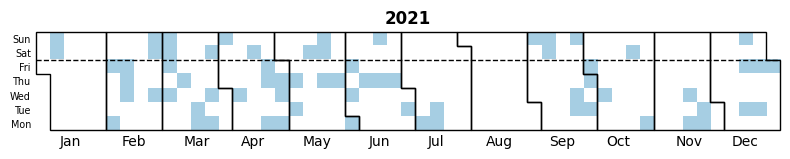

<ipython-input-64-d178e0134045>:24: RuntimeWarning: Mean of empty slice
  centroid_yy = list(np.nanmean(vectorized_day_dataset_no_nans[np.where(cluster_labels == i)[0], :], 0).transpose())


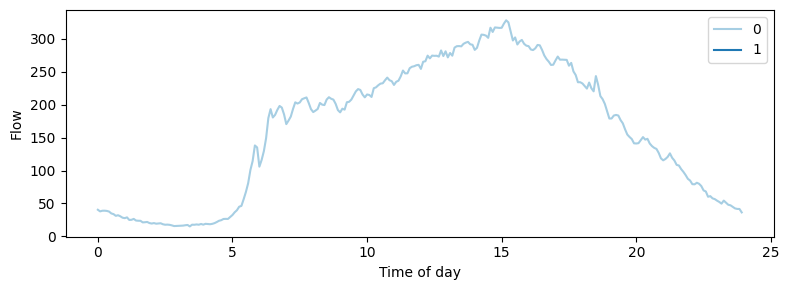

In [64]:
# Calculate the number of clusters by finding unique values in 'cluster_labels'
n_clusters_t = len(np.unique(cluster_labels))

# Assign colors to days based on clusters
days_colors, color_to_cluster, style_to_cluster = assign_colors(n_clusters_t, days_not_nans_eval, cluster_labels)
# The function 'assign_colors' is used to determine colors and styles for visualization.

# Create a calendar visualization figure
make_calendar_visualization_figure(days_not_nans_eval, cluster_labels, n_clusters_t, [2021], days_colors,
                                  color_to_cluster, save_figure=None)


# Initialize empty lists to store centroid data
centroids_xx = []  # x-axis values for centroids
centroids_yy_daytypes = []  # y-axis values for centroids, grouped by day types
cluster_ids = []  # Cluster IDs

# Iterate through each cluster
for i in range(0, n_clusters_t):
    # Store the x-axis values for centroids (hours of the day)
    centroids_xx.append(x_axis_hours)

    # Calculate the y-axis values for centroids (average flow for each 5-minute interval)
    centroid_yy = list(np.nanmean(vectorized_day_dataset_no_nans[np.where(cluster_labels == i)[0], :], 0).transpose())
    centroids_yy_daytypes.append(centroid_yy)

    # Store the cluster ID
    cluster_ids.append(i)

# Generate a figure displaying the centroids
make_figure_centroids(centroids_xx, centroids_yy_daytypes, color_to_cluster, style_to_cluster, cluster_ids)